In [2]:

from abstractLinModel import LinearModel  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Tuple, Union



In [3]:
class LinearRegression(LinearModel):
    """
    Класс линейной регрессии с поддержкой регуляризации и управления выводом данных о процессе обучения.
    
    Attributes:
        learning_rate (float): Скорость обучения.
        num_of_itr (int): Количество итераций для процесса обучения.
        l1 (float): Коэффициент L1-регуляризации.
        l2 (float): Коэффициент L2-регуляризации.
        verbose (bool): Флаг для вывода информации о ходе обучения.
    """

    def __init__(self, learning_rate: float, num_of_itr: int, l1: float = 0.0, l2: float = 0.0, verbose: bool = False) -> None:
        """
        Инициализация модели линейной регрессии.
        
        Args:
            learning_rate (float): Скорость обучения.
            num_of_itr (int): Количество итераций.
            l1 (float, optional): Коэффициент L1-регуляризации. По умолчанию 0.0.
            l2 (float, optional): Коэффициент L2-регуляризации. По умолчанию 0.0.
            verbose (bool, optional): Флаг для вывода информации о ходе обучения. По умолчанию False.
        """
        super().__init__(learning_rate, num_of_itr)
        self.learning_rate = learning_rate 
        self.num_of_itr = num_of_itr
        self.l1 = l1
        self.l2 = l2
        self.verbose = verbose

    def fit(self, x: Union[np.ndarray, pd.DataFrame], y: Union[np.ndarray, pd.Series]) -> None:
        """
        Обучение модели на предоставленных данных.
        
        Args:
            x (Union[np.ndarray, pd.DataFrame]): Матрица признаков.
            y (Union[np.ndarray, pd.Series]): Вектор целевых значений.
        """
        self.m, self.n = x.shape
        self.w = np.random.randn(self.n, 1) * 0.01
        self.b = 0
        self.x = x
        self.y = y
        self.loss_history = []  
        
        for i in range(self.num_of_itr):
            self.update_weights()
            mse_loss = self.MSE()
            self.loss_history.append(mse_loss)
            
            if self.verbose:
                print(f"Iteration {i+1}/{self.num_of_itr} - MSE Loss: {mse_loss:.4f}")
    
    def train_test_split(self, x: Union[np.ndarray, pd.DataFrame], y: Union[np.ndarray, pd.Series], test_size: float = 0.2) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
        """
        Разделение данных на обучающий и тестовый наборы.
        
        Args:
            x (Union[np.ndarray, pd.DataFrame]): Матрица признаков.
            y (Union[np.ndarray, pd.Series]): Вектор целевых значений.
            test_size (float, optional): Размер тестовой выборки в долях от общего количества данных. По умолчанию 0.2.
        
        Returns:
            Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]: Кортеж, содержащий обучающие и тестовые данные.
        """
        test_count = int(len(x) * test_size)
        indices = np.random.permutation(len(x))
        test_indices = indices[:test_count]
        train_indices = indices[test_count:]
        X_train, X_test = x[train_indices], x[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]
        return X_train, X_test, y_train, y_test

    def update_weights(self) -> None:
        """
        Обновление весов модели с учётом градиентного спуска и регуляризации.
        """
        prediction_y = self.predict(self.x)
        dw = -(self.x.T).dot(self.y - prediction_y) / self.m
        db = np.sum(self.y - prediction_y) / self.m

        if self.l1 > 0:
            dw += self.l1 * np.sign(self.w)
        if self.l2 > 0:
            dw += self.l2 * self.w

        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db
        

    def MSE(self, x: Union[np.ndarray, pd.DataFrame] = None, y: Union[np.ndarray, pd.Series] = None) -> float:
        """
        Вычисление средней квадратичной ошибки (MSE) с учетом регуляризации.
        
        Args:
            x (Union[np.ndarray, pd.DataFrame], optional): Матрица признаков. По умолчанию использует x, переданный в fit.
            y (Union[np.ndarray, pd.Series], optional): Вектор целевых значений. По умолчанию использует y, переданный в fit.
        
        Returns:
            float: Значение MSE с учётом регуляризации.
        """
        if x is None and y is None:
            x, y = self.x, self.y
        prediction_y = self.predict(x)
        mse_loss = np.mean((y - prediction_y) ** 2)
        l1_penalty = self.l1 * np.sum(np.abs(self.w))
        l2_penalty = self.l2 * np.sum(self.w ** 2)
        return mse_loss + l1_penalty + l2_penalty

    def predict(self, x: Union[np.ndarray, pd.DataFrame]) -> np.ndarray:
        """
        Выполняет предсказание на основе текущих весов модели.
        
        Args:
            x (Union[np.ndarray, pd.DataFrame]): Матрица признаков.
        
        Returns:
            np.ndarray: Вектор предсказанных значений.
        """
        return x.dot(self.w) + self.b

    def weight(self) -> np.ndarray:
        """
        Возвращает веса модели.
        
        Returns:
            np.ndarray: Текущие веса модели.
        """
        return self.w
    
    def analytical_solution(self, x: Union[np.ndarray, pd.DataFrame], y: Union[np.ndarray, pd.Series]) -> None:
        """
        Вычисляет веса аналитически с учетом L2-регуляризации.
        
        Args:
            x (Union[np.ndarray, pd.DataFrame]): Матрица признаков.
            y (Union[np.ndarray, pd.Series]): Вектор целевых значений.
        """
        x_with_bias = np.hstack([np.ones((x.shape[0], 1)), x])  # Добавление столбца единиц для смещения
        if self.l2 > 0:
            regularization_term = self.l2 * np.eye(x_with_bias.shape[1])
            weights = np.linalg.inv(x_with_bias.T @ x_with_bias + regularization_term) @ x_with_bias.T @ y
        else:
            weights = np.linalg.inv(x_with_bias.T @ x_with_bias) @ x_with_bias.T @ y
        self.b = weights[0]  # Смещение
        self.w = weights[1:].reshape(-1, 1)  # Веса
    def loss(self, x: Union[np.ndarray, pd.DataFrame] = None, y: Union[np.ndarray, pd.Series] = None) -> float:
        """
        Вычисление функции потерь, использующей среднеквадратичную ошибку (MSE) с учётом регуляризации.
        
        Args:
            x (Union[np.ndarray, pd.DataFrame], optional): Матрица признаков. По умолчанию использует x, переданный в fit.
            y (Union[np.ndarray, pd.Series], optional): Вектор целевых значений. По умолчанию использует y, переданный в fit.
        
        Returns:
            float: Значение функции потерь.
        """
        return self.MSE(x, y)

Iteration 1/10000 - MSE Loss: 5707749364.6574
Iteration 2/10000 - MSE Loss: 5704690673.9225
Iteration 3/10000 - MSE Loss: 5701633677.6913
Iteration 4/10000 - MSE Loss: 5698578375.0253
Iteration 5/10000 - MSE Loss: 5695524764.9863
Iteration 6/10000 - MSE Loss: 5692472846.6369
Iteration 7/10000 - MSE Loss: 5689422619.0401
Iteration 8/10000 - MSE Loss: 5686374081.2595
Iteration 9/10000 - MSE Loss: 5683327232.3591
Iteration 10/10000 - MSE Loss: 5680282071.4034
Iteration 11/10000 - MSE Loss: 5677238597.4576
Iteration 12/10000 - MSE Loss: 5674196809.5873
Iteration 13/10000 - MSE Loss: 5671156706.8586
Iteration 14/10000 - MSE Loss: 5668118288.3381
Iteration 15/10000 - MSE Loss: 5665081553.0931
Iteration 16/10000 - MSE Loss: 5662046500.1911
Iteration 17/10000 - MSE Loss: 5659013128.7004
Iteration 18/10000 - MSE Loss: 5655981437.6897
Iteration 19/10000 - MSE Loss: 5652951426.2283
Iteration 20/10000 - MSE Loss: 5649923093.3858
Iteration 21/10000 - MSE Loss: 5646896438.2325
Iteration 22/10000 - M

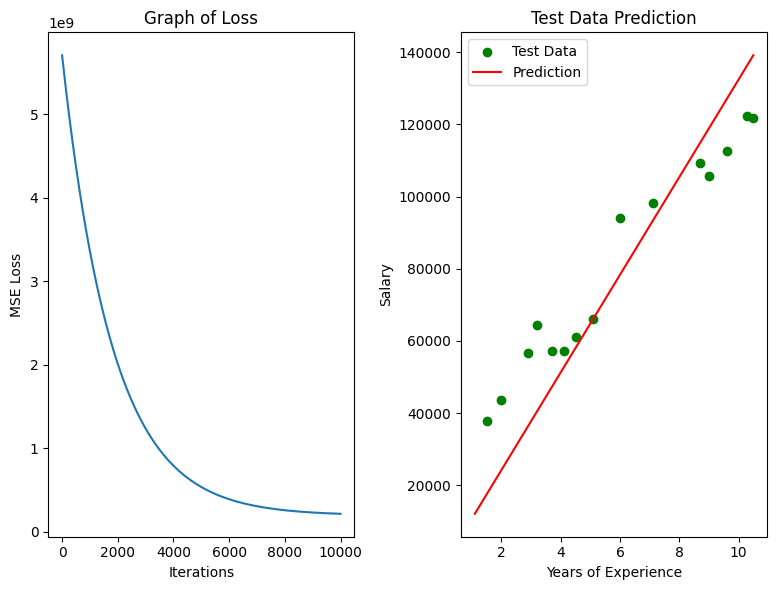

In [4]:
# Пример использования с данными
df = pd.read_csv('Salary_Data.csv')
x = df['YearsExperience'].values.reshape(-1, 1)
y = df['Salary'].values.reshape(-1, 1)

# Параметры обучения
model = LinearRegression(learning_rate=0.00001, num_of_itr=10000, verbose=True)
x_train, x_test, y_train, y_test = model.train_test_split(x, y, 0.5)
model.fit(x_train, y_train)

# Оцениваем модель на обучающих и тестовых данных
print(f"MSE on train data: {model.MSE(x_train, y_train)}")
print(f"MSE on test data: {model.MSE(x_test, y_test)}")
print(f"Weight: {model.weight()}")

# Построение графиков
plt.figure(figsize=(12, 6))

# График потерь
plt.subplot(1, 3, 1)
plt.plot(model.loss_history)
plt.xlabel('Iterations')
plt.ylabel('MSE Loss')
plt.title('Graph of Loss')

# График предсказанных и фактических значений на тестовых данных
plt.subplot(1, 3, 2)
plt.scatter(x_test, y_test, color='green', label='Test Data')
plt.plot(x, model.predict(x), color='red', label='Prediction')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Test Data Prediction')
plt.legend()



plt.tight_layout()
plt.show() 